In [18]:
#```{r results='hide', message=FALSE, warning=FALSE}
# install all Packages required
# install.packages('ggplot2')
# Load Libraries to be used
library(ggplot2)
library(knitr)
library(dplyr)
library(tidyverse)
library(summarytools)
library(visdat)
library(igraph)
#library(treemap)
#library(dplyr)
library(devtools)
library("readxl")
library(repr)

#install.packages("readxl")

# my_data <- read_excel(file.choose())
#```# Do not show warnings

In [2]:
# Change plot size to 4 x 3
options(repr.plot.width=12, repr.plot.height=12)

In [3]:
omicron_df <- read_excel("Data/omicron.xlsx", sheet="Data")
head(omicron_df)

ID,ACLENGTH,INTPLAN,DATAPLAN,DATAGB,OMMIN,OMCALL,OTMIN,OTCALL,NGMIN,NGCALL,IMIN,ICALL,CUSCALL,CHURN
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
409-8978,77,0,0,0,80.8,70,165.9,67,18.6,6,9.5,4,1,0
444-7077,105,0,0,0,131.8,66,131.7,105,5.1,6,6.7,2,0,0
401-9132,121,0,1,1.5G,212.1,57,195.4,140,14.9,14,28.6,8,1,0
409-2971,115,0,0,0,186.1,64,230.9,125,26.5,16,9.9,4,1,0
431-5175,133,0,1,1.5G,166.5,61,176.0,74,36.1,11,5.3,2,1,0
375-5486,95,0,1,500M,207.8,85,185.5,98,11.1,2,0.0,0,1,1



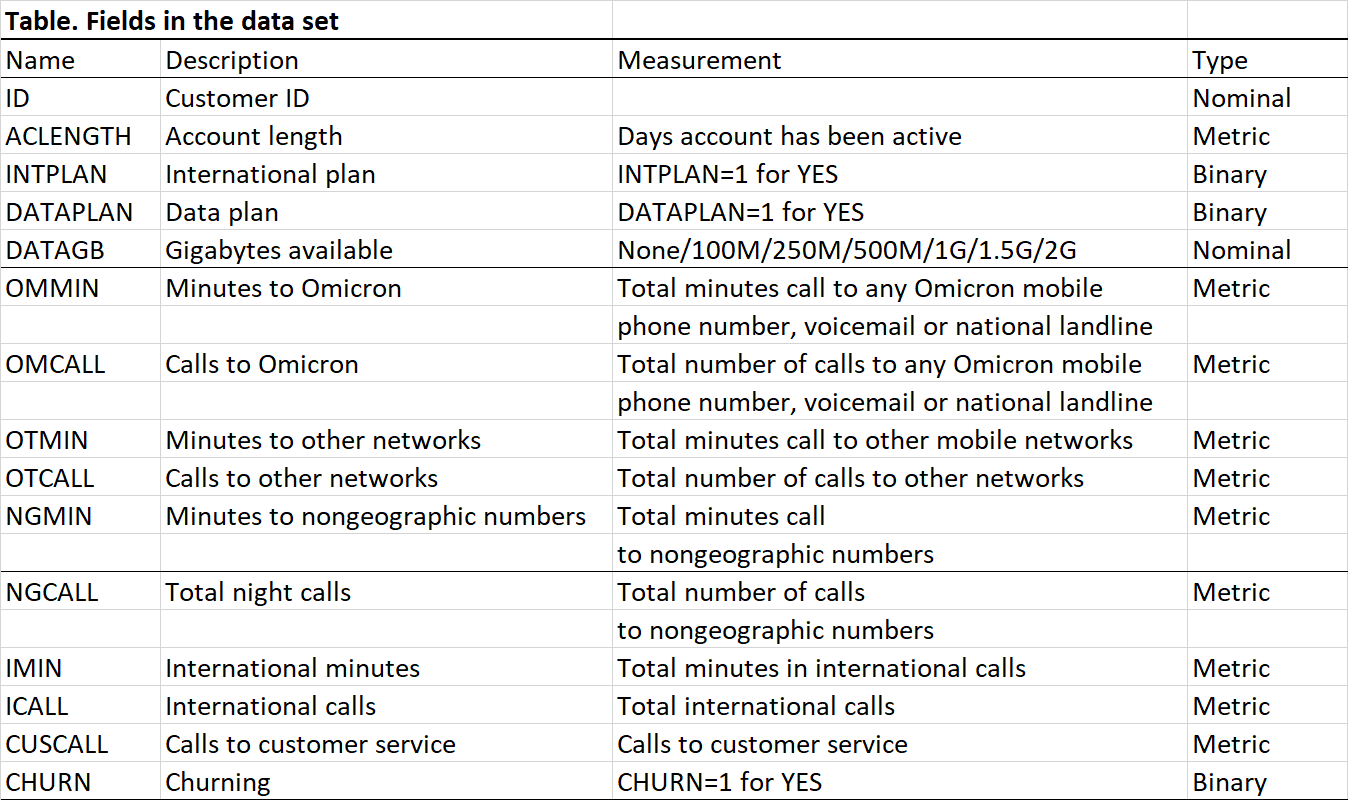

In [4]:
unique(omicron_df$DATAGB)

[1] "0"    "1.5G" "500M" "2G"   "1G"   "250M" "100M"

In [5]:
mod <- lm(CHURN ~ACLENGTH + as.factor(INTPLAN)+as.factor(DATAPLAN)+as.factor(DATAGB)+OMMIN+OMCALL+OTMIN+OTCALL+NGMIN+NGCALL+IMIN+ICALL+CUSCALL, data=omicron_df)
summary(mod)


Call:
lm(formula = CHURN ~ ACLENGTH + as.factor(INTPLAN) + as.factor(DATAPLAN) + 
    as.factor(DATAGB) + OMMIN + OMCALL + OTMIN + OTCALL + NGMIN + 
    NGCALL + IMIN + ICALL + CUSCALL, data = omicron_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84238 -0.18623 -0.10230  0.00599  1.10183 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.550e-01  3.501e-02  -7.283 3.77e-13 ***
ACLENGTH               4.831e-05  1.252e-04   0.386  0.69957    
as.factor(INTPLAN)1    4.175e-01  1.969e-02  21.204  < 2e-16 ***
as.factor(DATAPLAN)1   2.155e-02  2.146e-02   1.004  0.31537    
as.factor(DATAGB)1.5G -4.579e-02  2.574e-02  -1.779  0.07533 .  
as.factor(DATAGB)100M -2.904e-02  4.580e-02  -0.634  0.52611    
as.factor(DATAGB)1G   -7.796e-02  2.696e-02  -2.892  0.00384 ** 
as.factor(DATAGB)250M -5.141e-02  3.408e-02  -1.508  0.13154    
as.factor(DATAGB)2G   -3.942e-02  4.319e-02  -0.9

In [6]:
mod <- lm(CHURN ~ACLENGTH + as.factor(INTPLAN)+as.factor(DATAGB)+OMMIN+OMCALL+OTMIN+OTCALL+IMIN+ICALL+CUSCALL, data=omicron_df)
summary(mod)


Call:
lm(formula = CHURN ~ ACLENGTH + as.factor(INTPLAN) + as.factor(DATAGB) + 
    OMMIN + OMCALL + OTMIN + OTCALL + IMIN + ICALL + CUSCALL, 
    data = omicron_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81890 -0.18715 -0.10286  0.00539  1.09781 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.499e-01  3.373e-02  -7.407 1.51e-13 ***
ACLENGTH               5.260e-05  1.252e-04   0.420  0.67438    
as.factor(INTPLAN)1    4.176e-01  1.969e-02  21.210  < 2e-16 ***
as.factor(DATAGB)1.5G -2.477e-02  1.653e-02  -1.498  0.13414    
as.factor(DATAGB)100M -7.894e-03  4.134e-02  -0.191  0.84857    
as.factor(DATAGB)1G   -5.651e-02  1.838e-02  -3.075  0.00212 ** 
as.factor(DATAGB)250M -3.101e-02  2.779e-02  -1.116  0.26453    
as.factor(DATAGB)2G   -1.475e-02  3.840e-02  -0.384  0.70097    
as.factor(DATAGB)500M  2.135e-02  2.146e-02   0.995  0.32000    
OMMIN                  1.023e-03  1.166e-04   8.771  < 2e-16 ***

In [24]:
diff_churn <- omicron_df %>% group_by(CHURN) %>% summarize(ACLENGHT=mean(ACLENGTH),OMMIN = mean(OMMIN),
                                            OMCALL=mean(OMCALL),OTMIN =mean(OTMIN),
                                             OTCALL = mean(OTCALL),IMIN =mean(IMIN),
                                             ICALL =mean(ICALL),CUSCALL =mean(CUSCALL))

diff_churn[3,] <- 100*diff_churn[2,]/diff_churn[1,]

diff_churn

`summarise()` ungrouping output (override with `.groups` argument)



CHURN,ACLENGHT,OMMIN,OMCALL,OTMIN,OTCALL,IMIN,ICALL,CUSCALL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,100.7793,176.1958,70.23413,192.4642,93.05432,9.711186,2.658978,1.409226
1,101.4070,196.4285,73.89979,204.4477,95.53512,13.656921,4.243802,1.950413
Inf,100.6229,111.4831,105.21921,106.2264,102.66598,140.630837,159.602726,138.403135


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the st

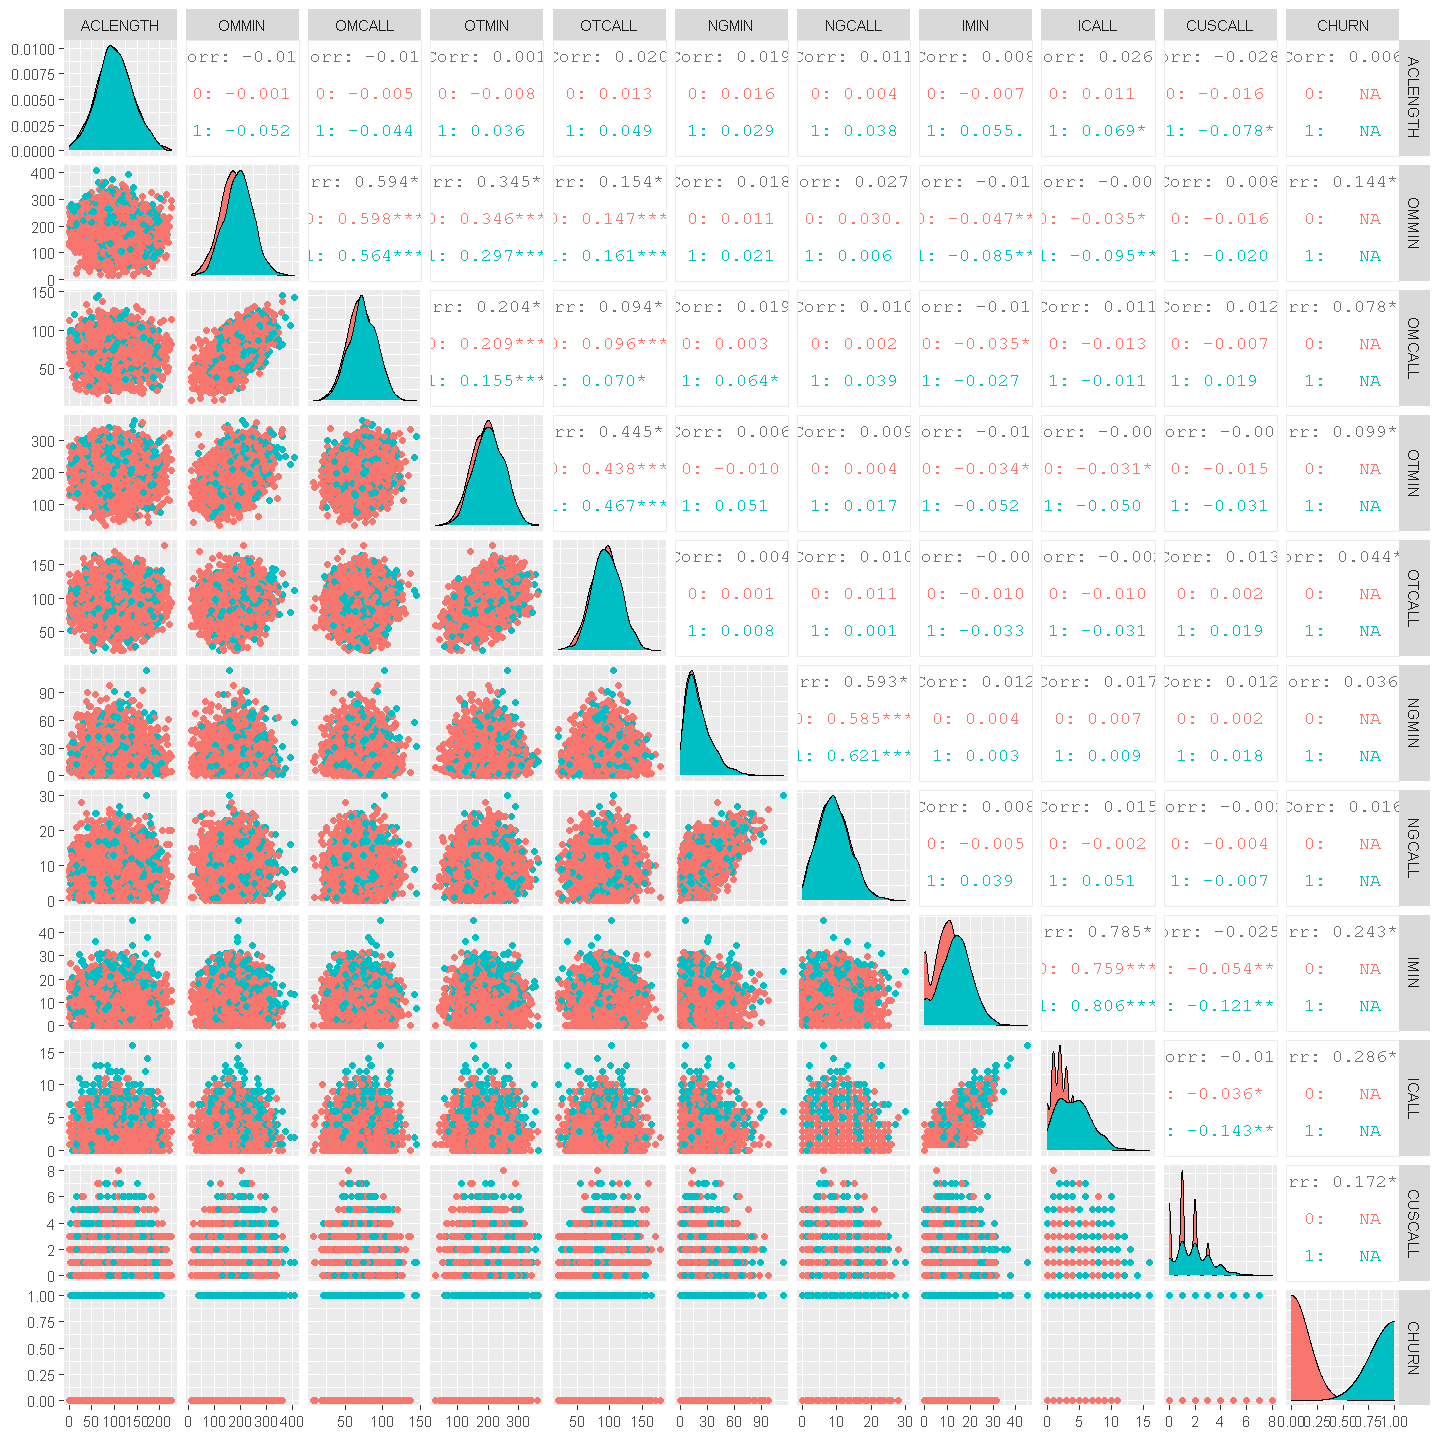

In [8]:
GGally::ggpairs(select(omicron_df, ACLENGTH,OMMIN:CUSCALL,CHURN), mapping = aes(color=as.factor(CHURN)))

In [9]:
mod <- lm(CHURN ~ OTMIN+OMMIN+IMIN+ CUSCALL+ as.factor(INTPLAN)+ as.factor(DATAGB), data=omicron_df)
summary(mod)


Call:
lm(formula = CHURN ~ OTMIN + OMMIN + IMIN + CUSCALL + as.factor(INTPLAN) + 
    as.factor(DATAGB), data = omicron_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82732 -0.18521 -0.10439  0.00501  1.09417 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.616e-01  2.571e-02 -10.173  < 2e-16 ***
OTMIN                  4.718e-04  1.111e-04   4.248 2.20e-05 ***
OMMIN                  9.444e-04  9.582e-05   9.856  < 2e-16 ***
IMIN                   6.855e-03  8.539e-04   8.028 1.23e-15 ***
CUSCALL                5.508e-02  4.016e-03  13.715  < 2e-16 ***
as.factor(INTPLAN)1    4.327e-01  1.787e-02  24.215  < 2e-16 ***
as.factor(DATAGB)1.5G -2.383e-02  1.652e-02  -1.442   0.1493    
as.factor(DATAGB)100M -7.864e-03  4.132e-02  -0.190   0.8490    
as.factor(DATAGB)1G   -5.654e-02  1.837e-02  -3.077   0.0021 ** 
as.factor(DATAGB)250M -3.048e-02  2.778e-02  -1.097   0.2725    
as.factor(DATAGB)2G   -1.416e-02  3.840e-

In [10]:
omicron_df$pred <- predict(mod)
omicron_df %>% select(ID,CHURN,pred) %>% head()

ID,CHURN,pred
<chr>,<dbl>,<dbl>
409-8978,0,0.01320774
444-7077,0,-0.02903076
401-9132,0,0.25823523
409-2971,0,0.14606637
431-5175,0,0.04629376
375-5486,1,0.09824645


In [11]:
omicron_df$pred_binary <- ifelse(omicron_df$pred >=0.5,1,0)
omicron_df %>% select(ID,CHURN,pred,pred_binary) %>% head()

ID,CHURN,pred,pred_binary
<chr>,<dbl>,<dbl>,<dbl>
409-8978,0,0.01320774,0
444-7077,0,-0.02903076,0
401-9132,0,0.25823523,0
409-2971,0,0.14606637,0
431-5175,0,0.04629376,0
375-5486,1,0.09824645,0


Confusion Matrix

In [12]:
x <- table(omicron_df$pred_binary,omicron_df$CHURN, dnn=c("predicted","actual"))
x

         actual
predicted    0    1
        0 3870  650
        1  162  318

In [19]:
chisq.test(x)


	Pearson's Chi-squared test with Yates' continuity correction

data:  x
X-squared = 744.47, df = 1, p-value < 2.2e-16


In [13]:
acc <- 100*(x[1,1]+x[2,2])/sum(x)
acc

[1] 83.76

In [17]:
caret::confusionMatrix(as.factor(omicron_df$pred_binary),as.factor(omicron_df$CHURN))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3870  650
         1  162  318
                                          
               Accuracy : 0.8376          
                 95% CI : (0.8271, 0.8477)
    No Information Rate : 0.8064          
    P-Value [Acc > NIR] : 6.558e-09       
                                          
                  Kappa : 0.3567          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9598          
            Specificity : 0.3285          
         Pos Pred Value : 0.8562          
         Neg Pred Value : 0.6625          
             Prevalence : 0.8064          
         Detection Rate : 0.7740          
   Detection Prevalence : 0.9040          
      Balanced Accuracy : 0.6442          
                                          
       'Positive' Class : 0               
                        

![Alt text](./Data/confMat.jpeg)